# 데이터 모형 구축 작업

## - 분류 : LogisticRegresion, SVC

## - 예측 : Linear_regression, SVM

In [1]:
import pandas as pd
import numpy as np

### 예측 - california 주택 가격

In [21]:
from sklearn import datasets

dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target

In [22]:
print(df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


#### 결측, 이상 구하기

In [23]:
print(df.isnull().sum()) #결측값 없음

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64


In [51]:
for col in df.columns: #이상치 
    data = df[col]
    q75 = np.quantile(data,0.75)
    q25 = np.quantile(data,0.25)
    IQR = q75 - q25
    
    lower = q25 - IQR*1.5
    upper = q75 + IQR*1.5
    
    lower_list = data[data<lower].index.tolist()
    upper_list = data[data>upper].index.tolist()
    
    #print(lower_list)
    #print(upper_list)
    
    for i in lower_list:
        df[col][i] = lower
    
    for i in upper_list:
        df[col][i] = upper
        

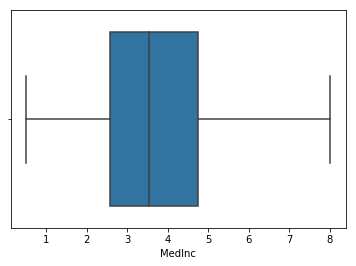

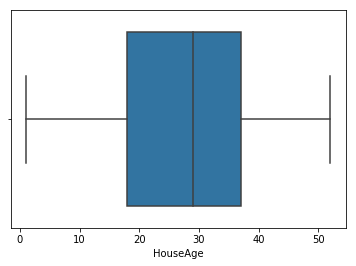

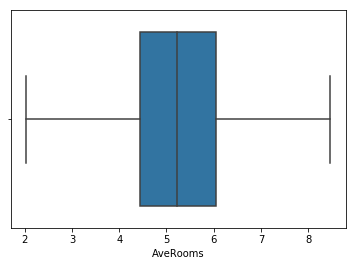

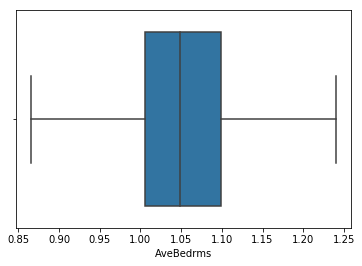

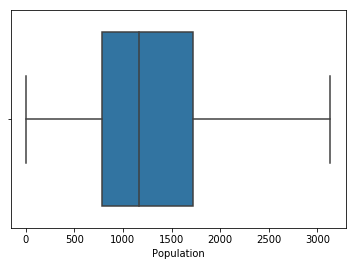

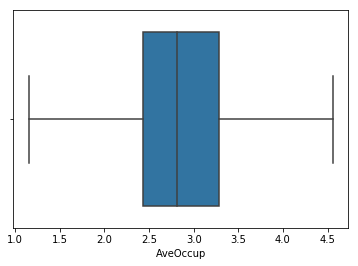

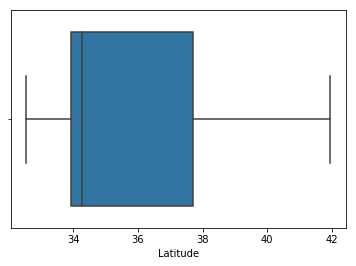

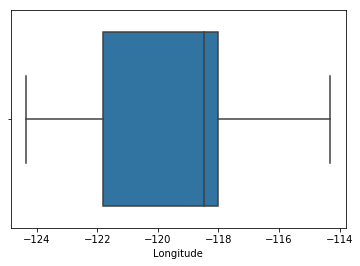

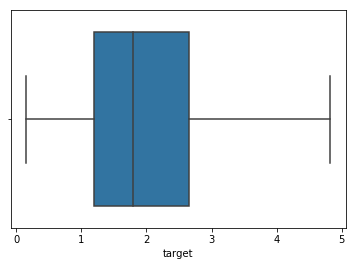

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
for count,i in enumerate(df.columns):
    sns.boxplot(df[i])
    plt.show()

In [55]:
from sklearn.model_selection import train_test_split

In [64]:
target = df['target']
df = df.drop('target',axis = 1)

In [65]:
x_train,x_test,y_train,y_test = train_test_split(df,target,test_size = 0.3,shuffle = True)

In [71]:
from sklearn.linear_model import LinearRegression
from sklearn import svm

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_squared_log_error

In [68]:
model1 = LinearRegression()
model1.fit(x_train,y_train)
model1.score(x_train,y_train)

0.6719286006144038

In [73]:
pred = model1.predict(x_test)
MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)
RMSE

0.6612519296412107